In [105]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pytrends.request import TrendReq

In [106]:
# Scrape trend data with pytrends 
pytrends = TrendReq(hl='en-US')

cat = '14' # people & society

timeframes = [
    'today 5-y',
    'today 12-m',
    'today 3-m',
    'today 1-m'
]

geo = '' # worldwide
gprop = '' # websearch

query = input("Get trends for which google search query? ")

kw_list = [query]

pytrends.build_payload(
    kw_list,
    cat,
    timeframes[0],
    geo,
    gprop
)

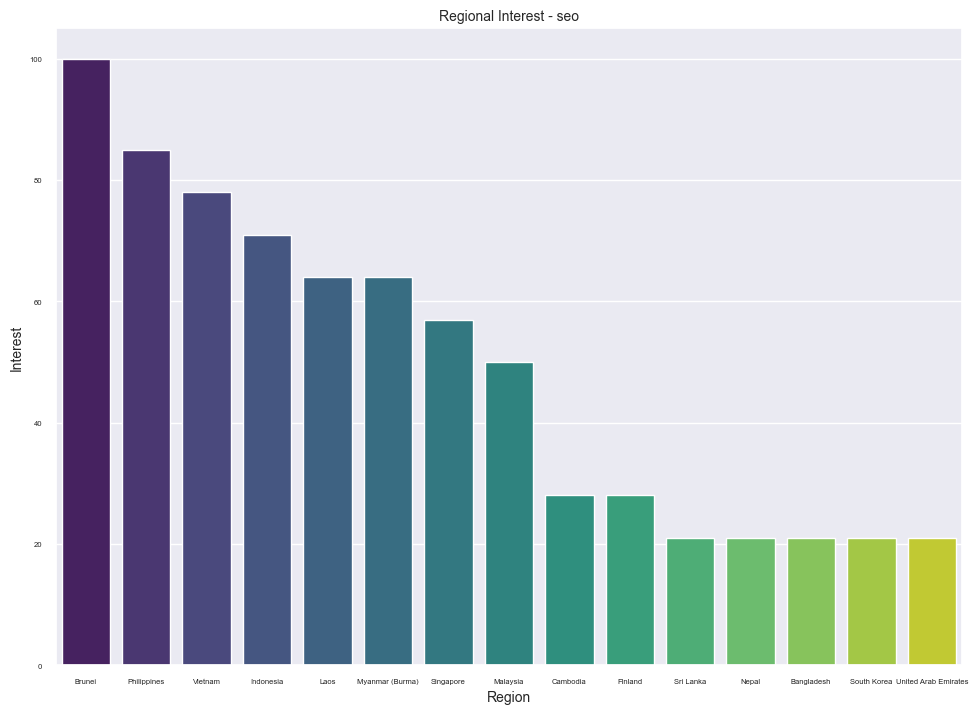

In [107]:
# Generate plot by region interest
df = pytrends.interest_by_region().sort_values(by=query, ascending=False).head(15)

sb.set(font_scale=0.5)
sb.barplot(x=df.index, y=query, data=df, palette="viridis")

plt.xlabel("Region", fontsize=10)
plt.ylabel("Interest", fontsize=10)
plt.title(f"Regional Interest - {query}", fontsize=10)

plt.show()

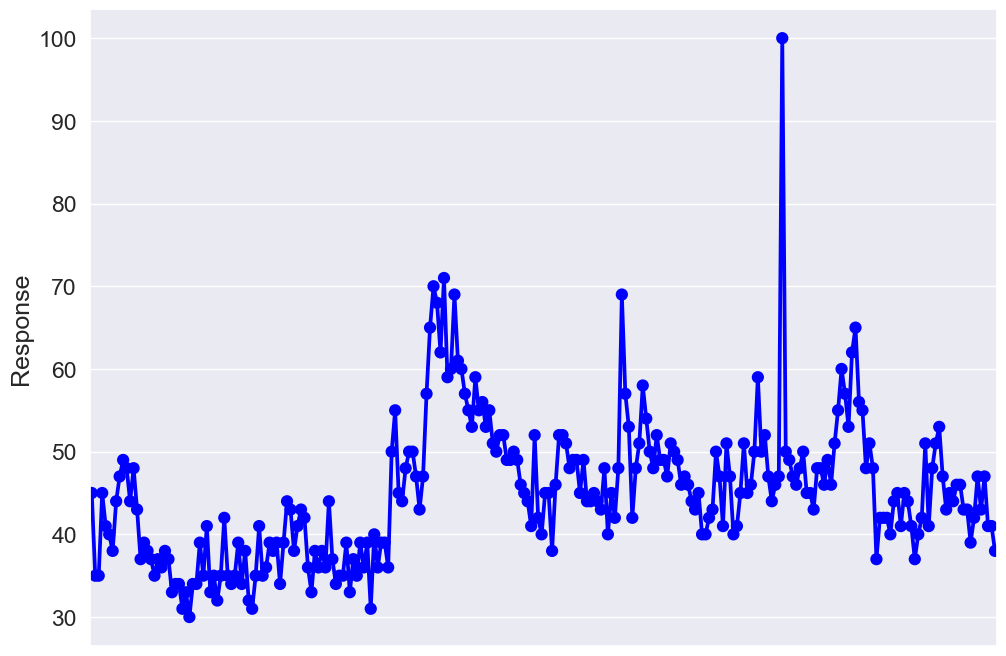

,seo,isPartial
date,,
2018-05-13,45,False
2018-05-20,35,False
2018-05-27,35,False
2018-06-03,45,False
2018-06-10,41,False
...,...,...
2023-04-02,43,False
2023-04-09,47,False
2023-04-16,41,False


In [113]:
# Generate plot by interest over time
df = pytrends.interest_over_time()

sb.set(font_scale=1.5)

ax = sb.pointplot(x=df.index, y=query, data=df, color='blue')
ax.xaxis.set_visible(False)

plt.ylabel('Interest', fontsize=10)

plt.show()
